## Decomposition comparison (STL, ARIMA, CLASSIC)

The most common methods to decompose a time series into its trend, seasonal, and residual components are:

1. Moving Averages: Moving averages are simple and widely used methods for decomposing time series. They involve calculating the average of a fixed window of data points and using it as the trend component. The seasonal component can be obtained by subtracting the trend from the original time series. The residual component represents the deviation from the trend and seasonal patterns.

2. Seasonal Decomposition of Time Series by Loess (STL): STL is a popular method that separates a time series into trend, seasonal, and residual components using locally weighted regression. It applies a combination of smoothing techniques to extract the components. STL can handle irregularly spaced data and provides robust decomposition.

3. Classical Decomposition: The classical decomposition method breaks down a time series into trend, seasonal, and residual components through mathematical formulas. It assumes that the seasonal pattern is fixed and repeats itself over time. Classical decomposition includes methods such as additive decomposition, where the components are added together, and multiplicative decomposition, where the components are multiplied together.


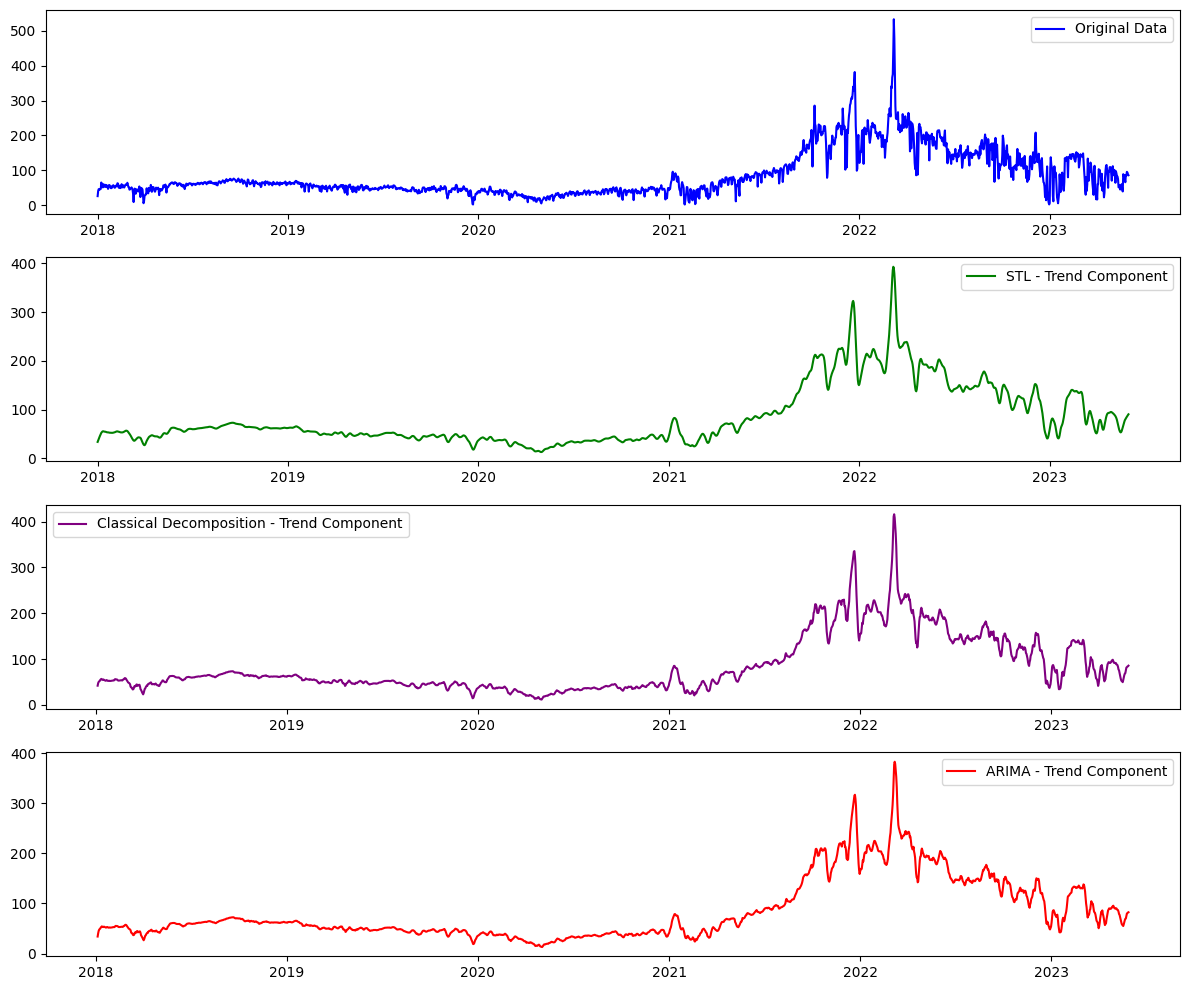

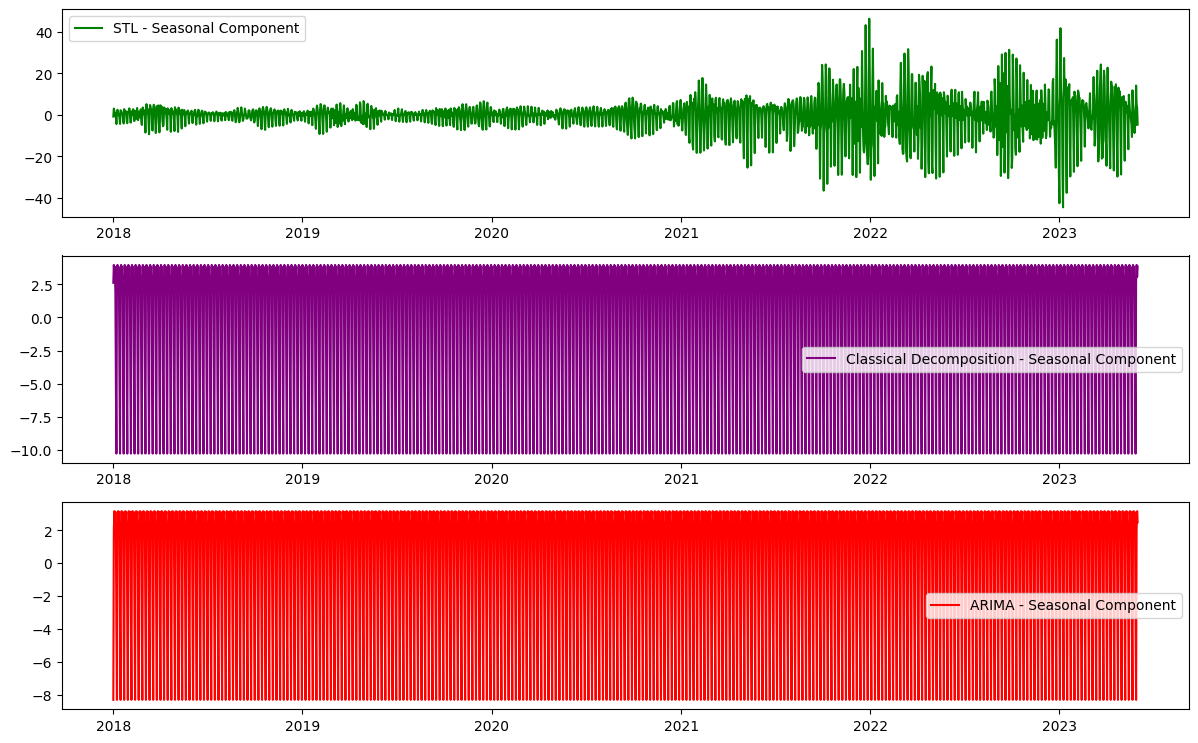

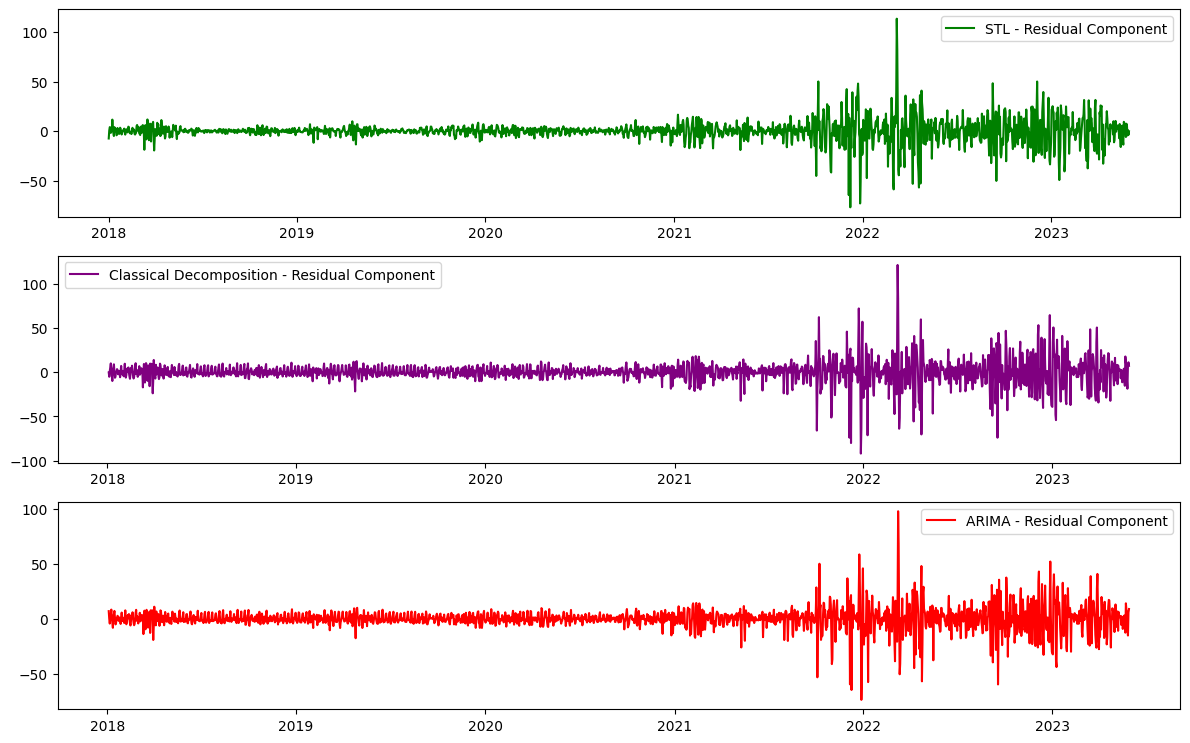

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the time series data into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/PHB009/dataset/model/combined_data.csv', parse_dates=['Date'])

# Specify the column for decomposition
column_name = 'Price'  # Replace 'YourColumnName' with the actual column name

# Filter the data within the desired date range
start_date = '2018-01-01'  # Specify the start date
end_date = '2023-06-01'    # Specify the end date
filtered_data = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

# Create a new DataFrame with only the specified column
#column_data = filtered_data[['Date', column_name]].copy()
#column_data.set_index('Date', inplace=True)
column_data = pd.DataFrame({
    'Date': pd.to_datetime(filtered_data['Date']),
    'Price': filtered_data[column_name]
}).set_index('Date').asfreq('D')

# Perform ARIMA decomposition
order = (1, 1, 1)             # Specify the order of the non-seasonal component
seasonal_order = (0, 0, 0, 7)  # Specify the seasonal component order and cycle length
model = ARIMA(column_data, order=order, seasonal_order=seasonal_order)
result_arima = model.fit()
# Get the fitted values of the ARIMA model
fitted_values = result_arima.fittedvalues
# Perform seasonal decomposition of the fitted values
result_decomposition = seasonal_decompose(fitted_values, model='additive')
trend_arima = result_decomposition.trend
seasonal_arima = result_decomposition.seasonal
residual_arima = result_decomposition.resid

# Perform STL decomposition
stl = STL(column_data['Price'])  # Provide the 'Price' column for decomposition
result_stl = stl.fit()
trend_stl = result_stl.trend
seasonal_stl = result_stl.seasonal
residual_stl = result_stl.resid

# Perform Classical decomposition
result_classical = seasonal_decompose(column_data[column_name], model='additive', period=7)
trend_classical = result_classical.trend
seasonal_classical = result_classical.seasonal
residual_classical = result_classical.resid

# Plot the original data and the components with different colors
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(column_data, color='blue', label='Original Data')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(trend_stl, color='green', label='STL - Trend Component')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(trend_classical, color='purple', label='Classical Decomposition - Trend Component')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(trend_arima, color='red', label='ARIMA - Trend Component')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 2)
plt.plot(seasonal_stl, color='green', label='STL - Seasonal Component')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(seasonal_classical, color='purple', label='Classical Decomposition - Seasonal Component')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(seasonal_arima, color='red', label='ARIMA - Seasonal Component')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 2)
plt.plot(residual_stl, color='green', label='STL - Residual Component')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(residual_classical, color='purple', label='Classical Decomposition - Residual Component')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(residual_arima, color='red', label='ARIMA - Residual Component')
plt.legend()
plt.tight_layout()
plt.show()

#Seasonal Decomposition of Time Series by Loess (STL)
STL is a popular method that separates a time series into trend, seasonal, and residual components using locally weighted regression. It applies a combination of smoothing techniques to extract the components. STL can handle irregularly spaced data and provides robust decomposition.

## Hyperparameter tunning
The choice of seasonal, trend, and low_pass values depends on the characteristics of the time series data and the specific patterns is expected to capture:

1. Seasonal: The seasonal parameter represents the length of the seasonal component in the time series data. It is usually chosen based on the known seasonality of the data or by analyzing the periodic patterns in the data. Common values for seasonal range from 7 (for weekly patterns) to 12 (for monthly patterns) or higher.

2. Trend: The trend parameter determines the smoothness of the trend component. It represents the length of the window used for estimating the trend. The value of trend should be an odd positive integer greater than or equal to 3, where trend > seasonal. A larger trend value results in a smoother trend, while a smaller value captures more short-term fluctuations. Common values for trend range from 3 to 9.

3. Low_pass: The low_pass parameter controls the smoothness of the remainder component after removing the seasonal and trend components. It represents the length of the window used for filtering the remainder. Similar to trend, low_pass should be an odd positive integer greater than or equal to 3, where low_pass > seasonal. A larger low_pass value results in a smoother remainder, while a smaller value preserves more high-frequency fluctuations. Common values for low_pass range from 3 to 9.

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error

# Read the time series data into a DataFrame
data = column_data

# Define the range of hyperparameter options to test
seasonal_options = [7, 13, 31]
trend_options = [9, 33, 61]
low_pass_options = [9, 33, 61]

best_params = None
best_rmse = float('inf')

# Iterate over all combinations of hyperparameters
for seasonal in seasonal_options:
    for trend in trend_options:
        if trend > seasonal:
            for low_pass in low_pass_options:
                if low_pass > seasonal:
                    # Perform STL decomposition with current hyperparameters
                    stl_model = STL(data['Price'], seasonal=seasonal, trend=trend, low_pass=low_pass)
                    decomposition = stl_model.fit()

                    # Calculate the residuals (remainder component)
                    residuals = data['Price'] - decomposition.seasonal - decomposition.trend

                    # Evaluate the performance metric (e.g., RMSE)
                    rmse = mean_squared_error(data['Price'], decomposition.seasonal + decomposition.trend + residuals, squared=False)

                    # Check if the current hyperparameters result in a better performance
                    if rmse < best_rmse:
                        best_params = {
                            'seasonal': seasonal,
                            'trend': trend,
                            'low_pass': low_pass
                        }
                        best_rmse = rmse

# Print the best hyperparameters and corresponding performance metric
print("Best Hyperparameters:")
print(best_params)
print("Best RMSE: {:.4f}".format(best_rmse))

Best Hyperparameters:
{'seasonal': 7, 'trend': 9, 'low_pass': 9}
Best RMSE: 0.0000


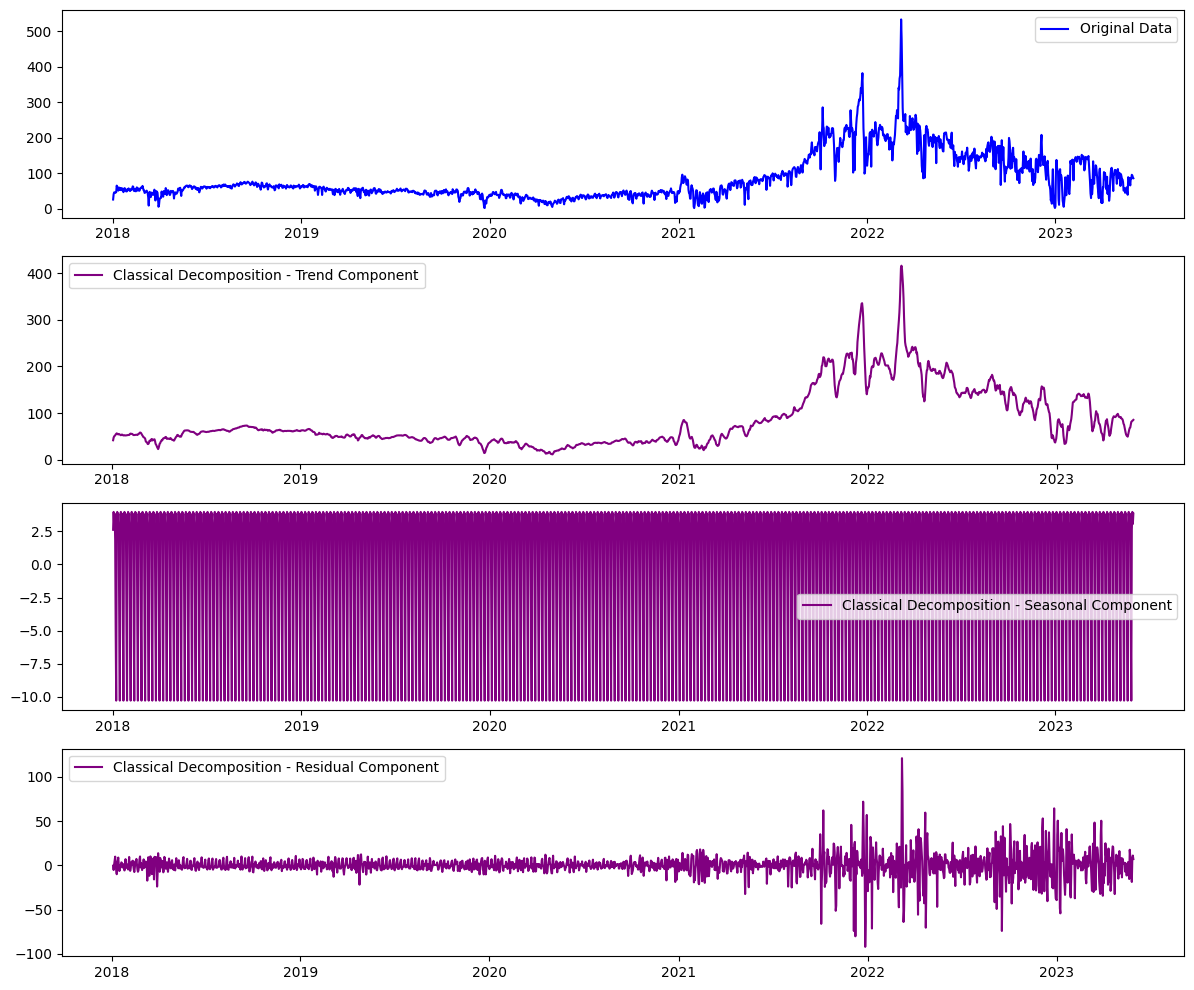

In [ ]:
# Perform STL decomposition
stl_model = STL(data['Price'], seasonal=7, trend=9, low_pass=9)
decomposition = stl_model.fit()
trend_stl = result_stl.trend
seasonal_stl = result_stl.seasonal
residual_stl = result_stl.resid

# Plot the original data and the components with different colors
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(column_data, color='blue', label='Original Data')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(trend_classical, color='purple', label='Classical Decomposition - Trend Component')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(seasonal_classical, color='purple', label='Classical Decomposition - Seasonal Component')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(residual_classical, color='purple', label='Classical Decomposition - Residual Component')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Save the STL decomposition components to a CSV file
result_stl_df = pd.DataFrame({
    'Date': column_data.index,
    'Trend': trend_stl,
    'Seasonal': seasonal_stl,
    'Residual': residual_stl
})
result_stl_df.to_csv('/content/drive/MyDrive/PHB009/dataset/model/stl_components.csv', index=False)